In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [2]:
df = pd.read_csv("day.xls")
print(df.shape)
print(df.info())
df.head()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
#removing the instant column as it is kind of id(primary key column) of the table
df.drop("instant", axis=1, inplace=True)

#replcing numerical values for categorical columns
month_conversion_obj = {'1':'jan', '2':'feb','3':'mar','4':'apr','5':'may','6':'jun','7':'jul','8':'aug','9':'sep','10':'oct','11':'nov','12':'dec'}
df["mnth"]=df["mnth"].apply(lambda x : month_conversion_obj[str(x)])

day_conversion_obj = {'0':'sunday', '1':'monday','2':'tuesday','3':'wednesday','4':'thursday','5':'friday','6':'saturday'}
df["weekday"]=df["weekday"].apply(lambda x : day_conversion_obj[str(x)])

season_conversion_obj = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
df["season"]=df["season"].apply(lambda x : season_conversion_obj[str(x)])

year_conversion_obj = {'0': '2018', '1':'2019'}
df["yr"]=df["yr"].apply(lambda x : year_conversion_obj[str(x)])

holiday_conversion_obj = {'1':'holiday', '0':'non-holiday'}
df["holiday"]=df["holiday"].apply(lambda x : holiday_conversion_obj[str(x)])

workingday_conversion_obj = {'1':'workingday', '0':'non-workingday'}
df["workingday"]=df["workingday"].apply(lambda x : workingday_conversion_obj[str(x)])

weathersit_conversion_obj = {'1':'ClearCloud','2':'Mist','3':'LightSnow','4':'HeavyRain'}
df["weathersit"]=df["weathersit"].apply(lambda x : weathersit_conversion_obj[str(x)])

#removing date column
df.drop("dteday", axis=1, inplace=True)

## Step 2: Visualising the Data
Visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

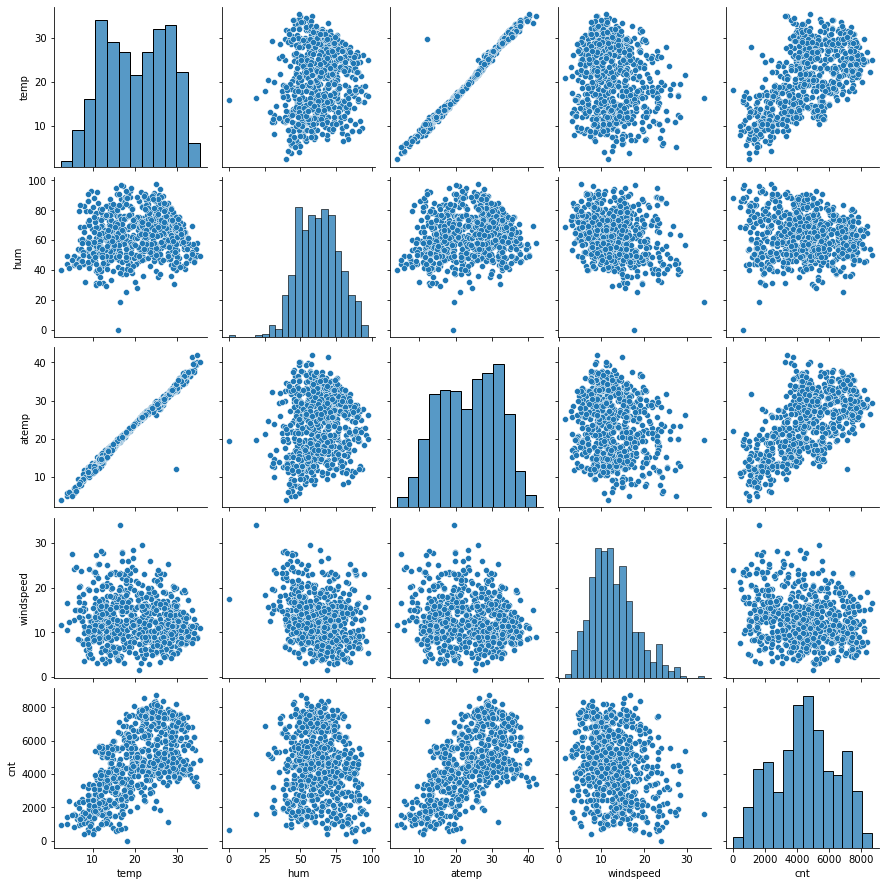

In [5]:
#omit categorical variables for pair plot
#the list of numerical variables
#instant,temp, atemp, hum, windspread, casual, registered, cnt
df_with_out_cat_var = df[["temp", "hum","atemp","windspeed", "cnt"]]
sns.pairplot(df_with_out_cat_var)
plt.show()

## Plotting the heatmap

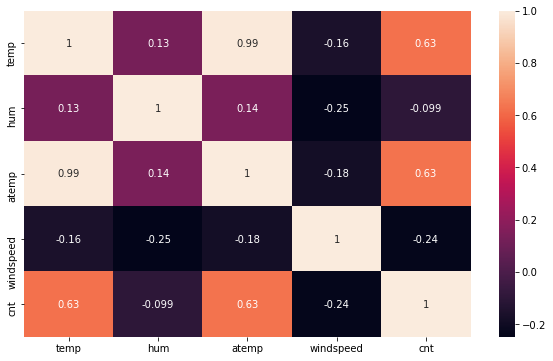

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_out_cat_var.corr(), annot=True)
plt.show()

#### Visualising Categorical Variables

there are a few categorical variables as well. Let's make a boxplot for some of these variables.

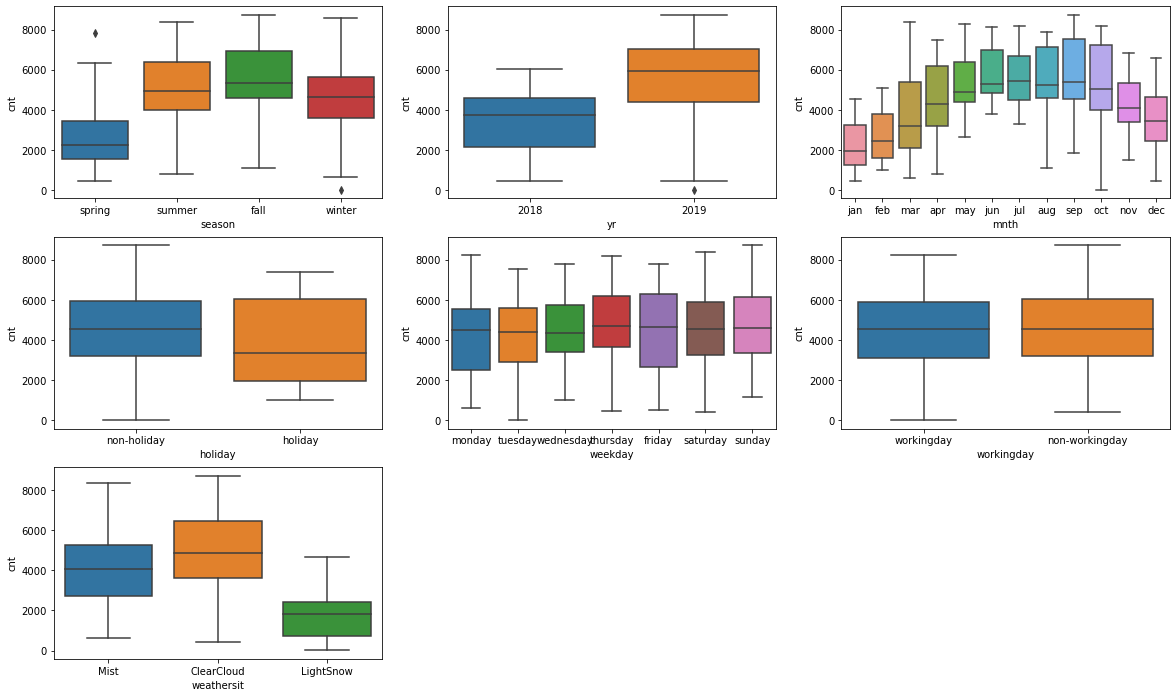

In [7]:
# the list of categorical vars are
#season, month, holiday, weekday, workingday, weathersit
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

## Conclusion from the data visualization
### From the numerical variable
1. `temp` and `atemp` have very high corelation, it will lead to multicollinearity
2. `temp` column have highest correlation with target column `cnt`
### From categorical variables
1. `season` seems to be affecting our`cnt` => `season` : `summer` and `fall` ahve center mass high
2. `yr` seems to be affecting our`cnt` => `yr` 2019 have increased `cnt` from 2018
3. `mnth` seems to be affecting our `cnt` => middle month of the year seems to have high `cnt` like `apr, may, jun, july, aug, sept`
4. `holiday` we don't see much impact on `cnt`
5. `weekday` no impact on `cnt
6. `workingday` no impact on `cnt
7. `weathersit` seems to be affecting our `cnt` => `weathersit` : `lightsnow` have decrease our `cnt`

## Dropping Unwanted columns
1. Remove `casual` and `registered` column as they dependent variable to our target variable `cnt`
2. Remove the column `atemp` as it is hightly correlated with `temp` table. It will cause multicollinearity.

In [8]:
df.drop("casual", axis=1, inplace=True)
df.drop("registered", axis=1, inplace=True)
df.drop("atemp", axis=1, inplace=True)

## Step 3: Adding dummy variables for categorical columns

In [9]:
season = pd.get_dummies(df['season'], drop_first = True)
yr = pd.get_dummies(df['yr'], drop_first = True)
month = pd.get_dummies(df['mnth'], drop_first = True)
holiday = pd.get_dummies(df['holiday'], drop_first = True)
weekday = pd.get_dummies(df['weekday'], drop_first = True)
workingday = pd.get_dummies(df['workingday'], drop_first = True)
weathersit = pd.get_dummies(df['weathersit'], drop_first = True)

# Add the results to the original housing dataframe

df = pd.concat([df, season, yr, month, holiday, weekday, workingday, weathersit], axis = 1)

In [10]:
# Drop original columns as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)
df.drop(['yr'], axis = 1, inplace = True)
df.drop(['mnth'], axis = 1, inplace = True)
df.drop(['holiday'], axis = 1, inplace = True)
df.drop(['weekday'], axis = 1, inplace = True)
df.drop(['workingday'], axis = 1, inplace = True)
df.drop(['weathersit'], axis = 1, inplace = True)

In [11]:
weekday.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [12]:
df.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,aug,dec,...,sep,non-holiday,monday,saturday,sunday,thursday,tuesday,wednesday,LightSnow,Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [13]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
Min-Max scaling 

In [14]:
scaler = MinMaxScaler()
num_vars = ['temp', "hum","windspeed"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

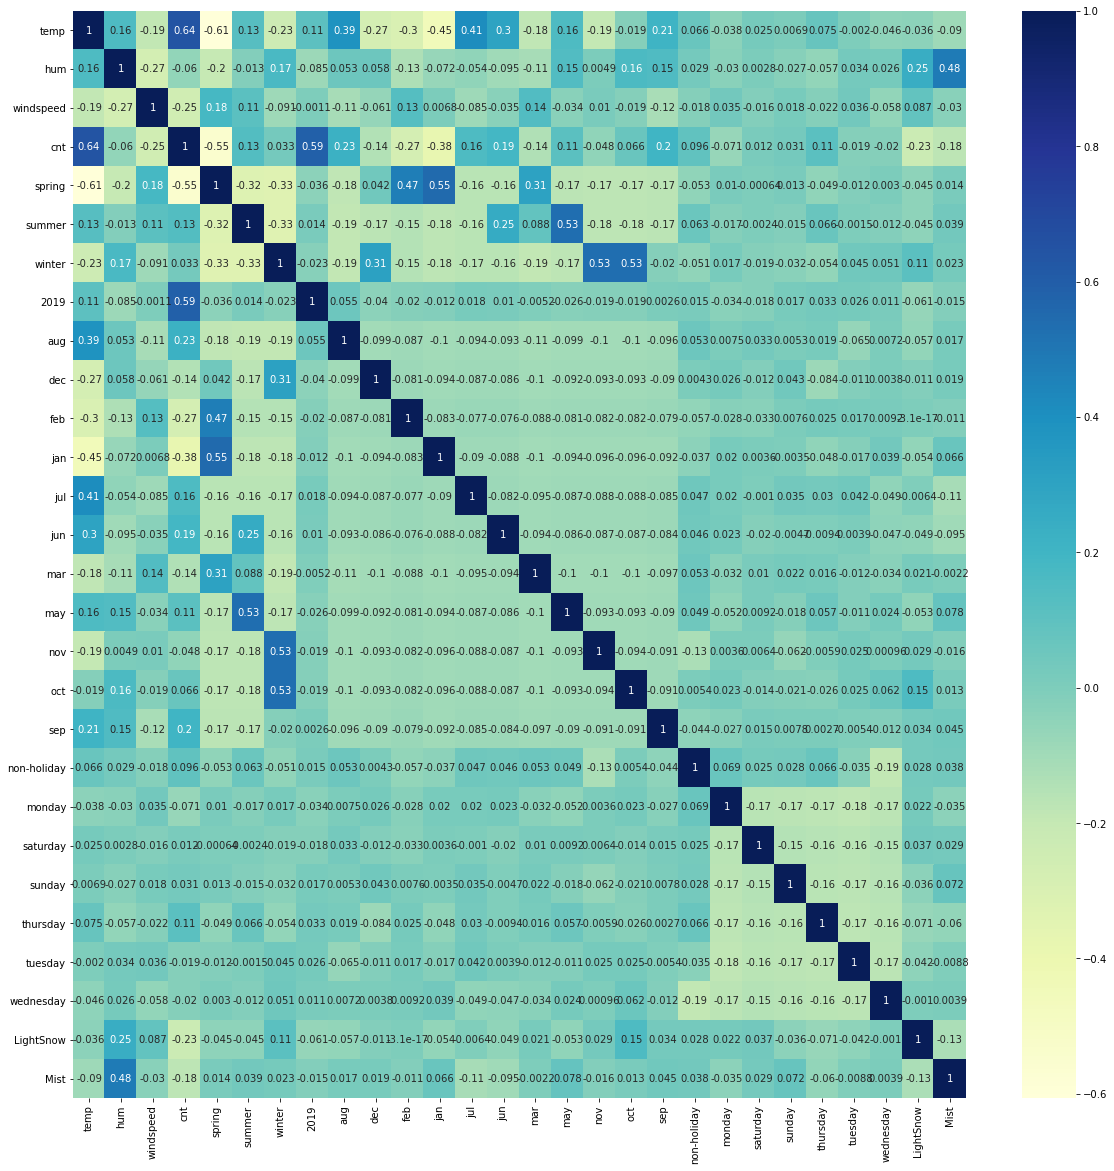

In [15]:
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [16]:
y_train = df_train['cnt']
X_train = df_train.drop('cnt', axis=1)
X_train.shape

(510, 27)

## Step 5: Building a linear model
### Model Selection using RFE and also using Statsmodel to get nice summary

In [17]:
# Add a constant
# Create a first fitted model
def getLmForFeatureCount(featureCount):
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm, featureCount)             # running RFE
    rfe = rfe.fit(X_train, y_train)
    col = X_train.columns[rfe.support_]
    X_train_rfe = X_train[col]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    print(lm.summary())
    X_train_new = X_train_rfe.drop(['const'], axis=1)
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return lm,col
lm, cols = getLmForFeatureCount(28)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          6.08e-180
Time:                        11:20:41   Log-Likelihood:                -4102.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     482   BIC:                             8379.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2182.2366    456.856      4.777      

In [18]:
X_train.drop(["hum"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(25)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.68e-178
Time:                        11:20:42   Log-Likelihood:                -4110.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     484   BIC:                             8384.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1669.3166    439.295      3.800      

In [19]:
X_train.drop(["non-holiday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     130.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.76e-181
Time:                        11:20:42   Log-Likelihood:                -4116.3
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     489   BIC:                             8364.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2392.5306    319.281      7.494      0.0

In [20]:
X_train.drop(["summer"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.19e-181
Time:                        11:20:43   Log-Likelihood:                -4117.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     489   BIC:                             8365.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2764.7010    260.316     10.621      0.0

In [21]:
X_train.drop(["thursday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     130.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.19e-181
Time:                        11:20:43   Log-Likelihood:                -4117.0
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     489   BIC:                             8365.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2764.7010    260.316     10.621      0.0

In [22]:
X_train.drop(["oct"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.47e-181
Time:                        11:20:43   Log-Likelihood:                -4117.3
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     489   BIC:                             8366.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2695.8699    234.739     11.485      0.0

In [23]:
X_train.drop(["sunday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.59e-181
Time:                        11:20:43   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     489   BIC:                             8366.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2715.0258    255.157     10.641      0.0

In [24]:
X_train.drop(["saturday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          5.59e-181
Time:                        11:20:43   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     489   BIC:                             8366.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2715.2857    256.590     10.582      0.0

In [25]:
X_train.drop(["wednesday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.95e-181
Time:                        11:20:44   Log-Likelihood:                -4119.5
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     490   BIC:                             8364.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2652.9911    255.238     10.394      0.0

In [26]:
X_train.drop(["temp"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.07e-168
Time:                        11:20:44   Log-Likelihood:                -4153.0
No. Observations:                 510   AIC:                             8344.
Df Residuals:                     491   BIC:                             8424.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4336.3529    165.324     26.229      0.0

In [27]:
X_train.drop(["mar"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     129.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.60e-169
Time:                        11:20:44   Log-Likelihood:                -4154.0
No. Observations:                 510   AIC:                             8344.
Df Residuals:                     492   BIC:                             8420.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4248.3668    152.651     27.831      0.0

In [28]:
X_train.drop(["monday"], axis=1, inplace=True)
lm,cols = getLmForFeatureCount(20)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.06e-168
Time:                        11:20:44   Log-Likelihood:                -4157.5
No. Observations:                 510   AIC:                             8349.
Df Residuals:                     493   BIC:                             8421.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4208.0793    152.731     27.552      0.0

## Step 6: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

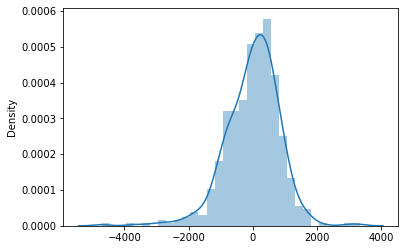

In [29]:
X_train_new = sm.add_constant(X_train[cols])
y_train_pred = lm.predict(X_train_new)
y_train_error = y_train-y_train_pred
sns.distplot(y_train_error)
plt.show()

## The residuals are following the normally distributed with a mean 0. All good!

In [30]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8146555050116937

In [31]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_pred))

839.6122725420835

## Step 7: Predictions on the Test Set

Now that we have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [32]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [33]:
y_test = df_test.pop('cnt')
X_test = df_test

In [34]:
X_test_new = X_test[cols]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation on Test data set

Let's now plot the graph for actual versus predicted values.

In [35]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7998247187679963

### r2_score of test VS r2_score of train
#### 0.7998 VS 0.8146
As we don't see much diff b/w r2_Score for training and test our model is good.

In [36]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_test_pred))

847.5251257160332

### RMSE of test VS RMSE of train
#### 847 VS 839
As we don't see much diff b/w RMSE for training and test our model is good.

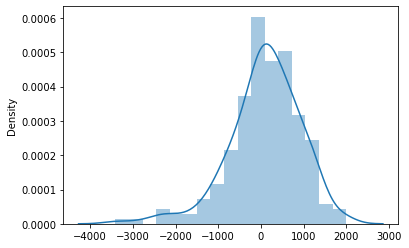

In [37]:
y_test_error = y_test-y_test_pred
sns.distplot(y_test_error)
plt.show()

Text(0, 0.5, 'y_pred')

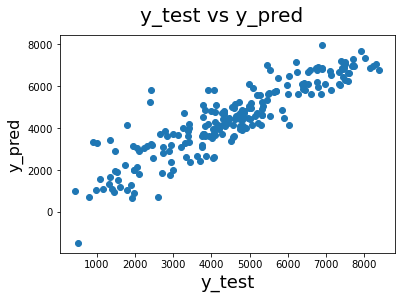

In [38]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [59]:
ans=lm.params.to_frame()
ans.columns = ['value']
ans['absvalue']=ans['value'].apply(lambda x :abs(x))
ans = ans.sort_values(by = "absvalue", ascending = False)

In [60]:
ans

,value,absvalue
const,4208.079266,4208.079266
LightSnow,-2604.611012,2604.611012
2019,2145.421160,2145.421160
jan,-1429.476180,1429.476180
windspeed,-1422.563279,1422.563279
sep,1176.589973,1176.589973
dec,-1040.996262,1040.996262
jun,1039.097995,1039.097995
aug,1032.478514,1032.478514
nov,-898.825409,898.825409
